# Setting up the environment (note: please use a python kernal for this script)

## Loading python packages

In [2]:
import pandas as pd # load and manipulate data for One-Hot ncoding
import numpy as np # calculate the mean and std. dev. 
import matplotlib.pyplot as plt # to plot figures
# !pip install xgboost --quiet
import xgboost as xgb # XGBoost engine..someone has to work, no?
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer # for scoring during cross validations
from sklearn.model_selection import GridSearchCV # for cross validation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# Loading data 

In [3]:
df = pd.DataFrame(pd.read_excel(r'C:\Users\asifr\OneDrive - State of New Mexico\Documents\Project Oil Price\Outputs\df.xlsx'))
pd.options.display.max_columns = 500
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df

,wti_spot_price_sead,brent_spot_price_sead,dubai_price_sead,index_china_gdp_sead,index_us_gdp_sead,index_cboe_volt_sead,us_unemploy_sead,index_ip_mining_sead,index_cpi_china_sead,opec_sead,non_opec_sead,index_cpi_us_sea,index_energy_sead,index_metal_sead,index_precious_sead,del_supply_nonopec_sead,del_cap_per_sead,del_world_gdp_per_sead,del_supply_saudi_sead,opec_spare_capacity_sead,oecd_inventory_sead,del_world_consump_sead,sv_911,sv_covid19,sv_gfc,sv_lpc,sv_opec,nm_oil_price,wti_spot_price,brent_spot_price,dubai_price,index_china_gdp,index_us_gdp,index_cboe_volt,us_unemploy,index_ip_mining,index_cpi_china,opec,non_opec,index_cpi_us,index_energy,index_metal,index_precious,del_supply_nonopec,del_cap_per,del_world_gdp_per,del_supply_saudi,opec_spare_capacity,oecd_inventory,del_world_consump
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-10-01,-4.490646,-4.226309,18.856513,0.000937,0.227692,27.673258,0.598185,-1.049224,-0.769879,-860.534407,209.852667,0.015057,21.642637,14.523215,14.523215,0.082598,0.959399,0.959399,-1.118946,5.075130,56.310536,0.831312,1,0,0,0,0,18.556667,20.400000,19.350000,18.238671,98.223037,80.245,27.910000,5.500000,82.9672,-0.133333,27307.658667,40521.307667,-0.299975,27.180842,31.450600,22.616555,0.64,1.04,1.80,-1.19,5.21,3963.919000,1.48
2002-01-01,0.549873,1.298047,20.049251,0.289063,0.267035,21.835409,0.248901,-2.372902,-0.792123,-886.490642,165.250462,0.072270,21.382668,16.255997,16.255997,0.272427,1.188425,1.188425,-1.218224,6.418502,50.330375,0.935855,1,0,0,0,0,19.463333,21.656667,21.133333,20.019124,98.160446,80.504,21.360833,5.700000,80.8947,-0.600000,26221.237000,40685.595667,0.394686,28.928240,33.278799,23.651520,0.80,0.84,2.19,-1.17,6.10,3962.906333,2.52
2002-04-01,3.984386,2.823201,21.356935,0.271872,0.281793,22.399876,0.117971,-0.235625,-0.524632,-136.395835,514.960462,0.099996,23.155462,19.310258,19.310258,0.299186,1.487938,1.487938,-0.638675,6.401345,-14.841305,0.435733,1,0,0,0,0,24.353333,26.246667,25.053333,24.272817,98.393999,80.783,21.643125,5.833333,80.7034,-1.066667,25681.775000,40906.192000,0.204967,34.013575,33.500873,25.412918,1.56,1.81,2.71,-0.53,6.69,3977.571667,2.71
2002-07-01,1.523430,1.585978,24.596098,0.064648,0.398350,33.437746,-0.066227,-0.265306,0.516133,278.343329,-212.359239,0.315314,24.727300,15.919829,15.919829,-0.495299,0.592642,0.592642,-0.180427,6.009848,-50.213447,-1.322607,1,0,0,0,0,26.420000,28.340000,26.930000,25.575567,98.697058,81.172,35.068438,5.733333,80.1187,-0.766667,26543.531000,40615.380000,0.203447,35.722116,32.354218,25.452320,0.74,0.76,3.26,-0.27,5.86,3971.300667,1.54
2002-10-01,2.002322,2.000562,25.017763,-0.036708,0.446995,30.604044,0.067198,-0.856318,0.293766,743.941067,104.733869,0.301491,26.607639,17.440095,17.440095,0.015500,0.079919,0.079919,0.427349,4.452035,-47.202333,0.426174,1,0,0,0,0,26.473333,28.216667,26.736667,25.014893,98.996896,81.638,30.726719,5.866667,79.2454,-0.633333,27287.422333,41094.401667,-0.018294,37.222773,33.203148,25.924394,0.74,-0.07,3.33,0.37,4.50,3901.982000,1.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,-1.850041,-1.121303,64.433985,-0.026061,0.462764,15.551509,0.030173,0.749180,-0.328517,-1099.420444,2453.239283,0.204249,62.980573,54.666311,54.666311,-1.246996,1.363382,1.363382,-0.157307,2.207457,5.221518,-0.031430,0,0,0,0,0,48.226667,54.826667,63.170000,63.360000,98.784252,111.562,16.468689,3.866667,118.8664,1.833333,30484.000000,57420.000000,0.392500,79.504670,78.996017,99.153513,2.35,1.10,2.88,-0.11,2.19,4417.014951,0.95
2019-04-01,1.586849,1.600618,66.351174,0.034717,0.500572,15.607082,-0.231803,2.310075,0.847382,-582.377567,502.860794,0.137087,64.345841,54.681416,54.681416,-0.162970,1.055850,1.055850,-0.249013,2.239887,11.392439,-7.273676,0,0,0,0,0,54.936667,59.783333,68.923333,67.030000,98.631879,112.184,15.183016,3.633333,121.36

# Visualizing the target variable : nm_oil_price

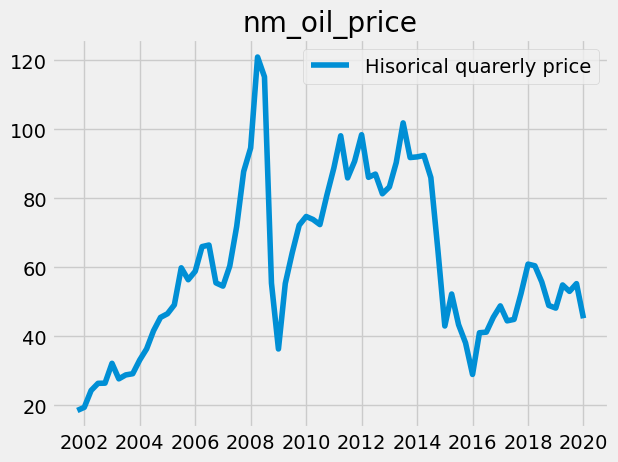

In [4]:
plt.plot(df['nm_oil_price'], label = 'Hisorical quarerly price')
plt.title('nm_oil_price')
plt.legend()

In [5]:
df_nm = df[['nm_oil_price']].copy(deep= True)

In [6]:
df_nm.head()

,nm_oil_price
Date,
2001-10-01,18.556667
2002-01-01,19.463333
2002-04-01,24.353333
2002-07-01,26.420000
2002-10-01,26.473333


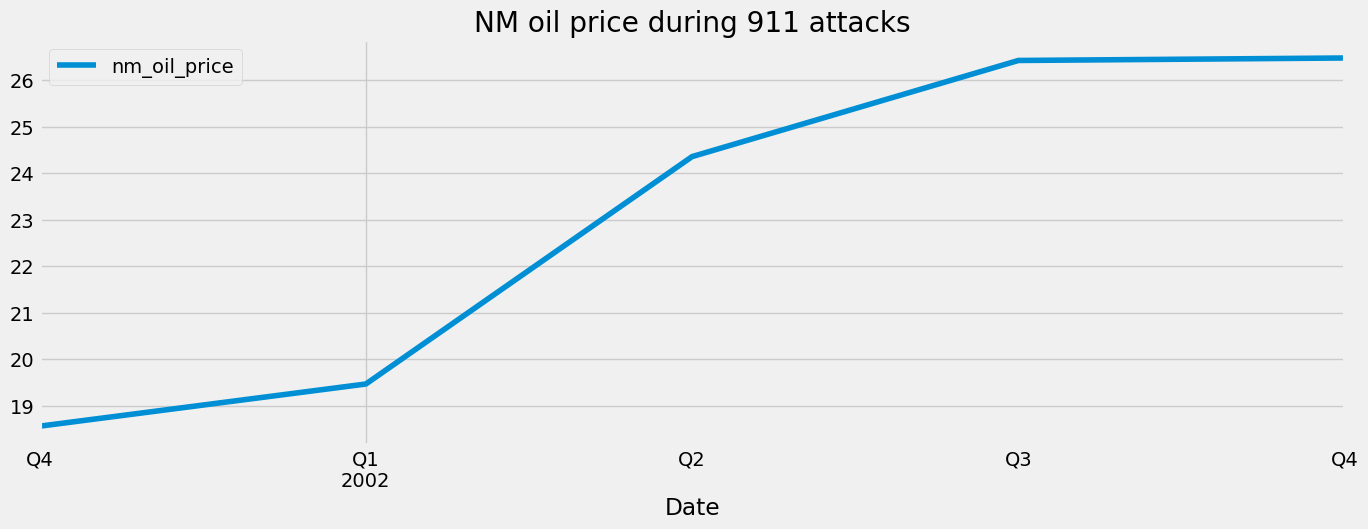

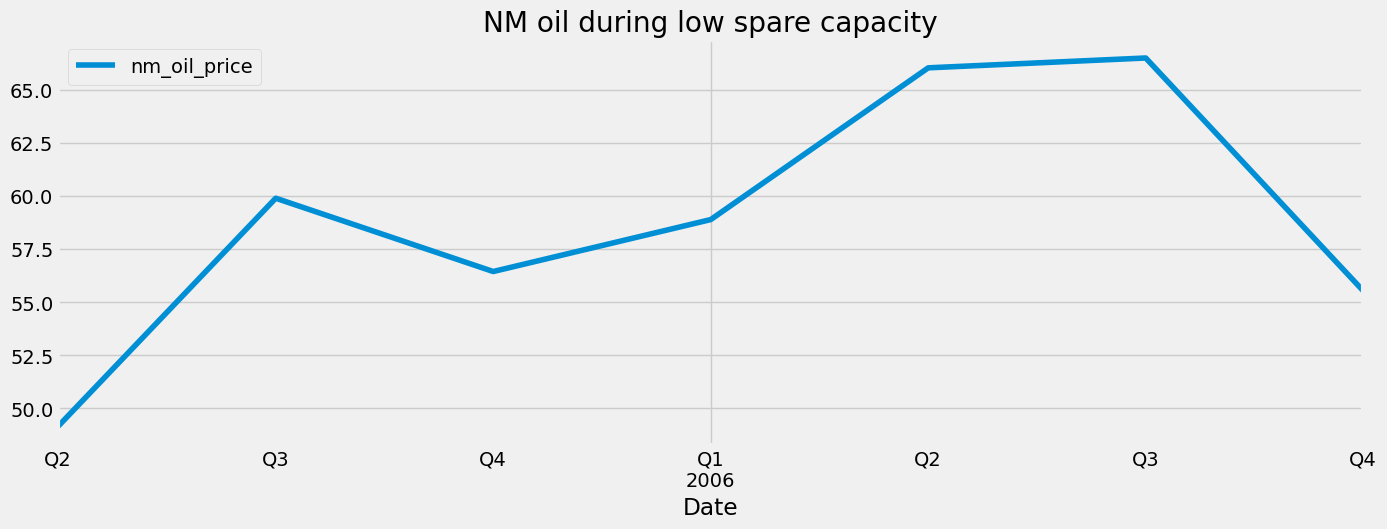

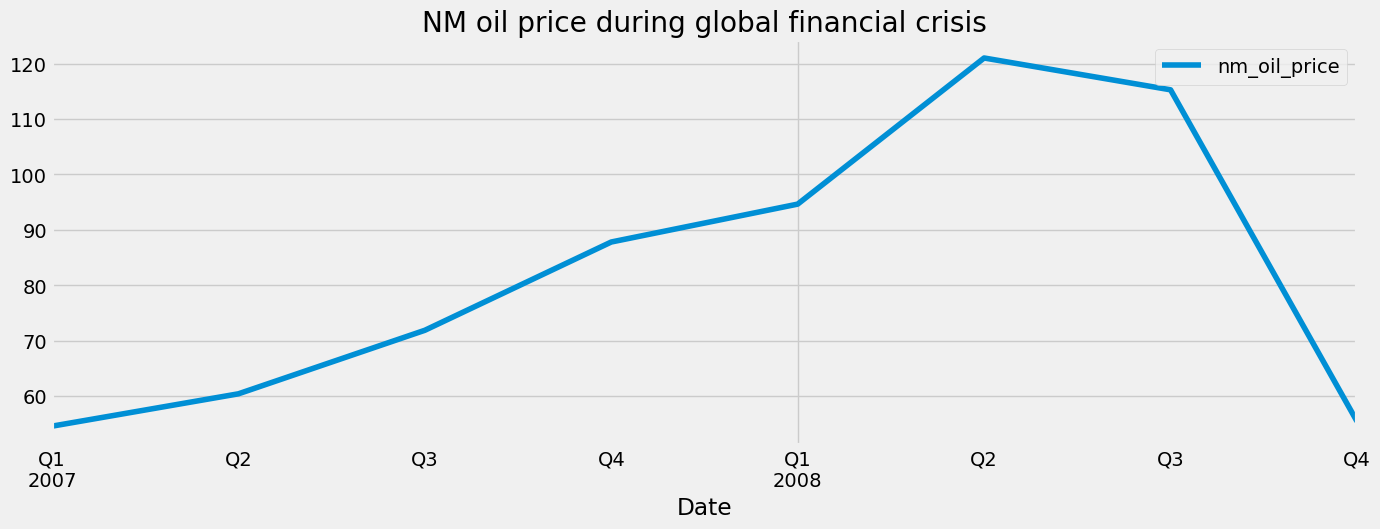

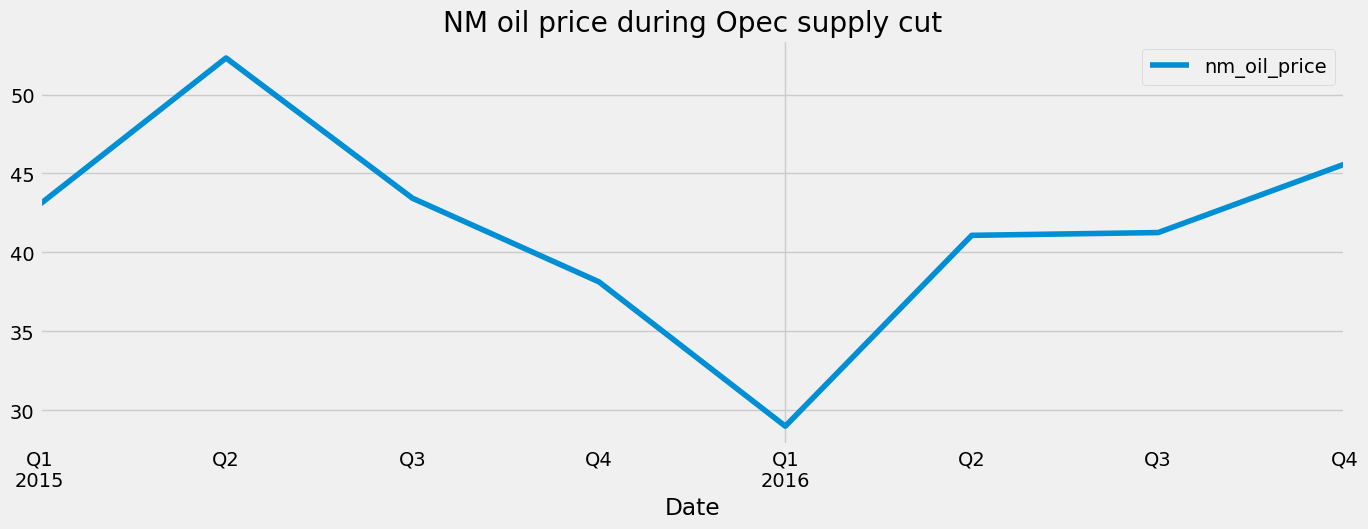

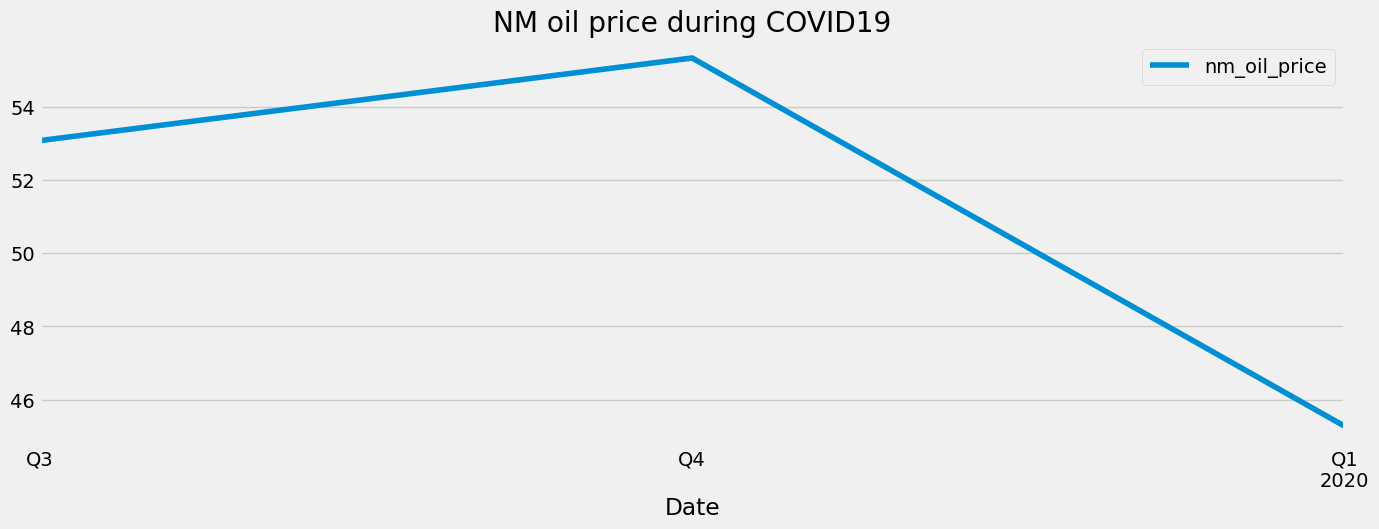

In [7]:


df_nm.loc[(df_nm.index >= '2001-01-01') & (df_nm.index <= '2002-12-30')] \
    .plot(figsize=(15, 5), title='NM oil price during 911 attacks')
plt.show()

df_nm.loc[(df_nm.index >= '2005-04-01') & (df_nm.index <= '2006-10-01')] \
    .plot(figsize=(15, 5), title='NM oil during low spare capacity')
plt.show()

df_nm.loc[(df_nm.index >= '2007-01-01') & (df_nm.index <= '2008-12-30')] \
    .plot(figsize=(15, 5), title='NM oil price during global financial crisis')
plt.show()

df_nm.loc[(df_nm.index >= '2015-01-01') & (df_nm.index <= '2016-12-30')] \
    .plot(figsize=(15, 5), title='NM oil price during Opec supply cut')
plt.show()

df_nm.loc[(df_nm.index >= '2019-06-01') & (df_nm.index <= '2020-12-30')] \
    .plot(figsize=(15, 5), title='NM oil price during COVID19')
plt.show()

In [8]:
def create_features(df_nm):
    """
    Create time series features based on time series index.
    """
    df_nm = df_nm.copy()
    df_nm['quarter'] = df_nm.index.quarter
    df_nm['year'] = df_nm.index.year
    return df_nm

df_nm = create_features(df_nm)

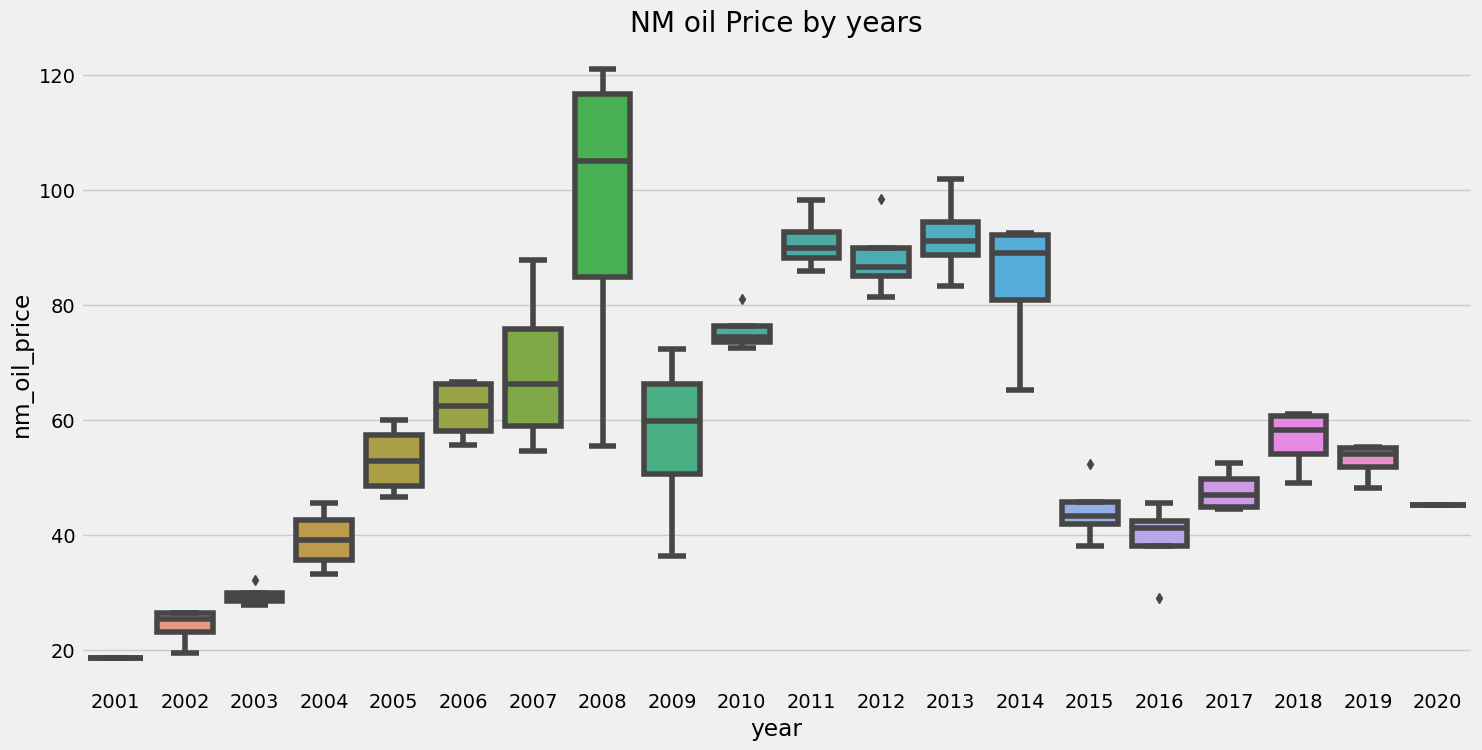

In [9]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=df_nm, x='year', y='nm_oil_price')
ax.set_title('NM oil Price by years')
plt.show()

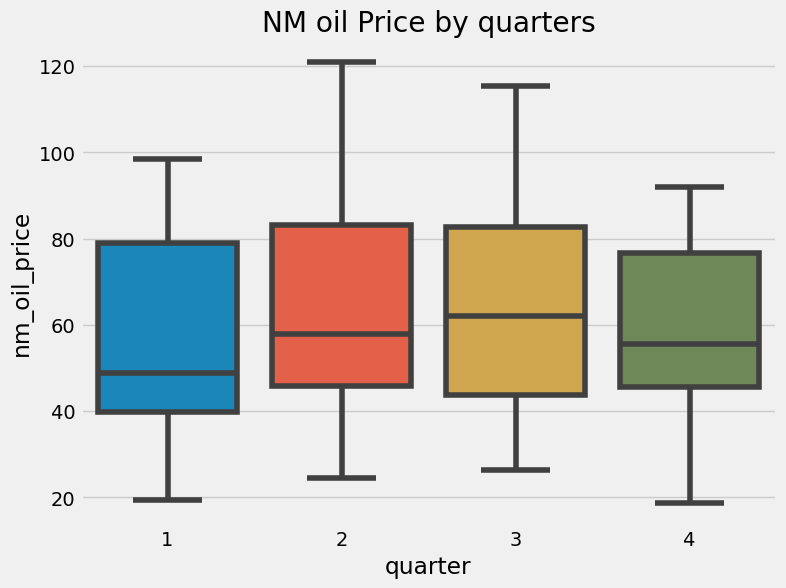

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_nm, x='quarter', y='nm_oil_price')
ax.set_title('NM oil Price by quarters')
plt.show()

# Creating train-test split

## Plotting the train-test split

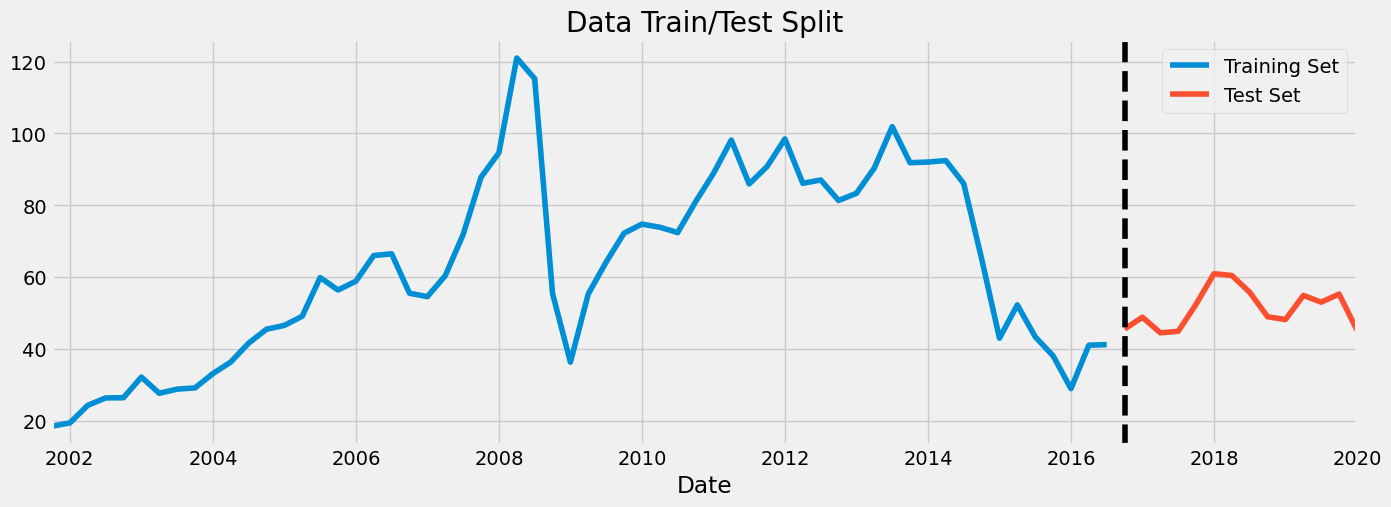

In [11]:
train = df.loc[df.index < '10-01-2016']
test = df.loc[df.index >= '10-01-2016']

fig, ax = plt.subplots(figsize=(15, 5))
train["nm_oil_price"].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test["nm_oil_price"].plot(ax=ax, label='Test Set')
ax.axvline('10-01-2016', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

## Creating model features

In [12]:
train = create_features(train)
test = create_features(test)

FEATURES = ['wti_spot_price_sead', 'brent_spot_price_sead', 'dubai_price_sead',\
       'index_china_gdp_sead', 'index_us_gdp_sead', 'index_cboe_volt_sead',\
       'us_unemploy_sead', 'index_ip_mining_sead', 'index_cpi_china_sead',\
       'opec_sead', 'non_opec_sead', 'index_cpi_us_sea', 'index_energy_sead',\
       'index_metal_sead', 'index_precious_sead', 'del_supply_nonopec_sead',\
       'del_cap_per_sead', 'del_world_gdp_per_sead', 'del_supply_saudi_sead',\
       'opec_spare_capacity_sead', 'oecd_inventory_sead',\
       'del_world_consump_sead', 'sv_911', 'sv_covid19', 'sv_gfc', 'sv_lpc',\
       'sv_opec']

TARGET = 'nm_oil_price'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [18]:
# print(train.keys())
X_train

,wti_spot_price_sead,brent_spot_price_sead,dubai_price_sead,index_china_gdp_sead,index_us_gdp_sead,index_cboe_volt_sead,us_unemploy_sead,index_ip_mining_sead,index_cpi_china_sead,opec_sead,non_opec_sead,index_cpi_us_sea,index_energy_sead,index_metal_sead,index_precious_sead,del_supply_nonopec_sead,del_cap_per_sead,del_world_gdp_per_sead,del_supply_saudi_sead,opec_spare_capacity_sead,oecd_inventory_sead,del_world_consump_sead,sv_911,sv_covid19,sv_gfc,sv_lpc,sv_opec
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-10-01,-4.490646,-4.226309,18.856513,0.000937,0.227692,27.673258,0.598185,-1.049224,-0.769879,-860.534407,209.852667,0.015057,21.642637,14.523215,14.523215,0.082598,0.959399,0.959399,-1.118946,5.075130,56.310536,0.831312,1,0,0,0,0
2002-01-01,0.549873,1.298047,20.049251,0.289063,0.267035,21.835409,0.248901,-2.372902,-0.792123,-886.490642,165.250462,0.072270,21.382668,16.255997,16.255997,0.272427,1.188425,1.188425,-1.218224,6.418502,50.330375,0.935855,1,0,0,0,0
2002-04-01,3.984386,2.823201,21.356935,0.271872,0.281793,22.399876,0.117971,-0.235625,-0.524632,-136.395835,514.960462,0.099996,23.155462,19.310258,19.310258,0.299186,1.487938,1.487938,-0.638675,6.401345,-14.841305,0.435733,1,0,0,0,0
2002-07-01,1.523430,1.585978,24.596098,0.064648,0.398350,33.437746,-0.066227,-0.265306,0.516133,278.343329,-212.359239,0.315314,24.727300,15.919829,15.919829,-0.495299,0.592642,0.592642,-0.180427,6.009848,-50.213447,-1.322607,1,0,0,0,0
2002-10-01,2.002322,2.000562,25.017763,-0.036708,0.446995,30.604044,0.067198,-0.856318,0.293766,743.941067,104.733869,0.301491,26.607639,17.440095,17.440095,0.015500,0.079919,0.079919,0.427349,4.452035,-47.202333,0.426174,1,0,0,0,0
2003-01-01,5.113635,4.163722,30.097262,-0.001302,0.414598,30.582692,0.045778,0.918112,0.795805,497.591272,235.890426,0.278182,33.627127,19.282852,19.282852,0.514741,-1.975467,-1.975467,1.577670,2.083559,-46.779193,0.039085,0,0,0,0,0
2003-04-01,-5.844529,-6.516159,22.446265,-0.023879,0.284743,22.321760,0.258361,-0.640489,0.163933,200.131535,-104.756402,-0.203656,27.352981,20.532109,20.532109,-1.295887,-4.367954,-4.367954,1.599301,1.312259,50.449592,1.222056,0,0,0,0,0
2003-07-01,0.509971,1.730029,25.133972,0.151733,0.473878,18.369445,0.022006,0.878437,0.343583,-395.822858,585.825006,0.393023,30.014716,23.716126,23.716126,1.317553,-1.496097,-1.496097,0.826712,2.329477,64.112670,1.499397,0,0,0,0,0
2003-10-01,3.112640,3.277040,29.315428,0.016713,0.498442,17.433961,-0.350956,0.234576,1.972808,1356.800498,404.739938,0.162688,32.677113,25.329187,25.329187,0.328473,1.083812,1.083812,0.562605,1.999325,13.529178,-0.499872,0,0,0,0,0


# Running XGBoost regression

## Running regreesion on train data

In [15]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=6000,
                       early_stopping_rounds=50,
                       objective='reg:squarederror',
                       max_depth=3,
                       learning_rate=0.001)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:67.11375	validation_1-rmse:51.13009
[100]	validation_0-rmse:61.12263	validation_1-rmse:46.05944
[200]	validation_0-rmse:55.67970	validation_1-rmse:41.35171
[300]	validation_0-rmse:50.73683	validation_1-rmse:37.07573
[400]	validation_0-rmse:46.25039	validation_1-rmse:33.30276
[500]	validation_0-rmse:42.17627	validation_1-rmse:29.94001
[600]	validation_0-rmse:38.47830	validation_1-rmse:26.87619
[700]	validation_0-rmse:35.12260	validation_1-rmse:23.99482
[800]	validation_0-rmse:32.07832	validation_1-rmse:21.35874
[900]	validation_0-rmse:29.31819	validation_1-rmse:19.02188
[1000]	validation_0-rmse:26.81613	validation_1-rmse:17.03823
[1100]	validation_0-rmse:24.55075	validation_1-rmse:15.21430
[1200]	validation_0-rmse:22.49829	validation_1-rmse:13.51608
[1300]	validation_0-rmse:20.64314	validation_1-rmse:12.00726
[1400]	validation_0-rmse:18.96104	validation_1-rmse:10.67523
[1500]	validation_0-rmse:17.43061	validation_1-rmse:9.51391
[1600]	validation_0-rmse:16.03669	val

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=6000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Plotting variable importance

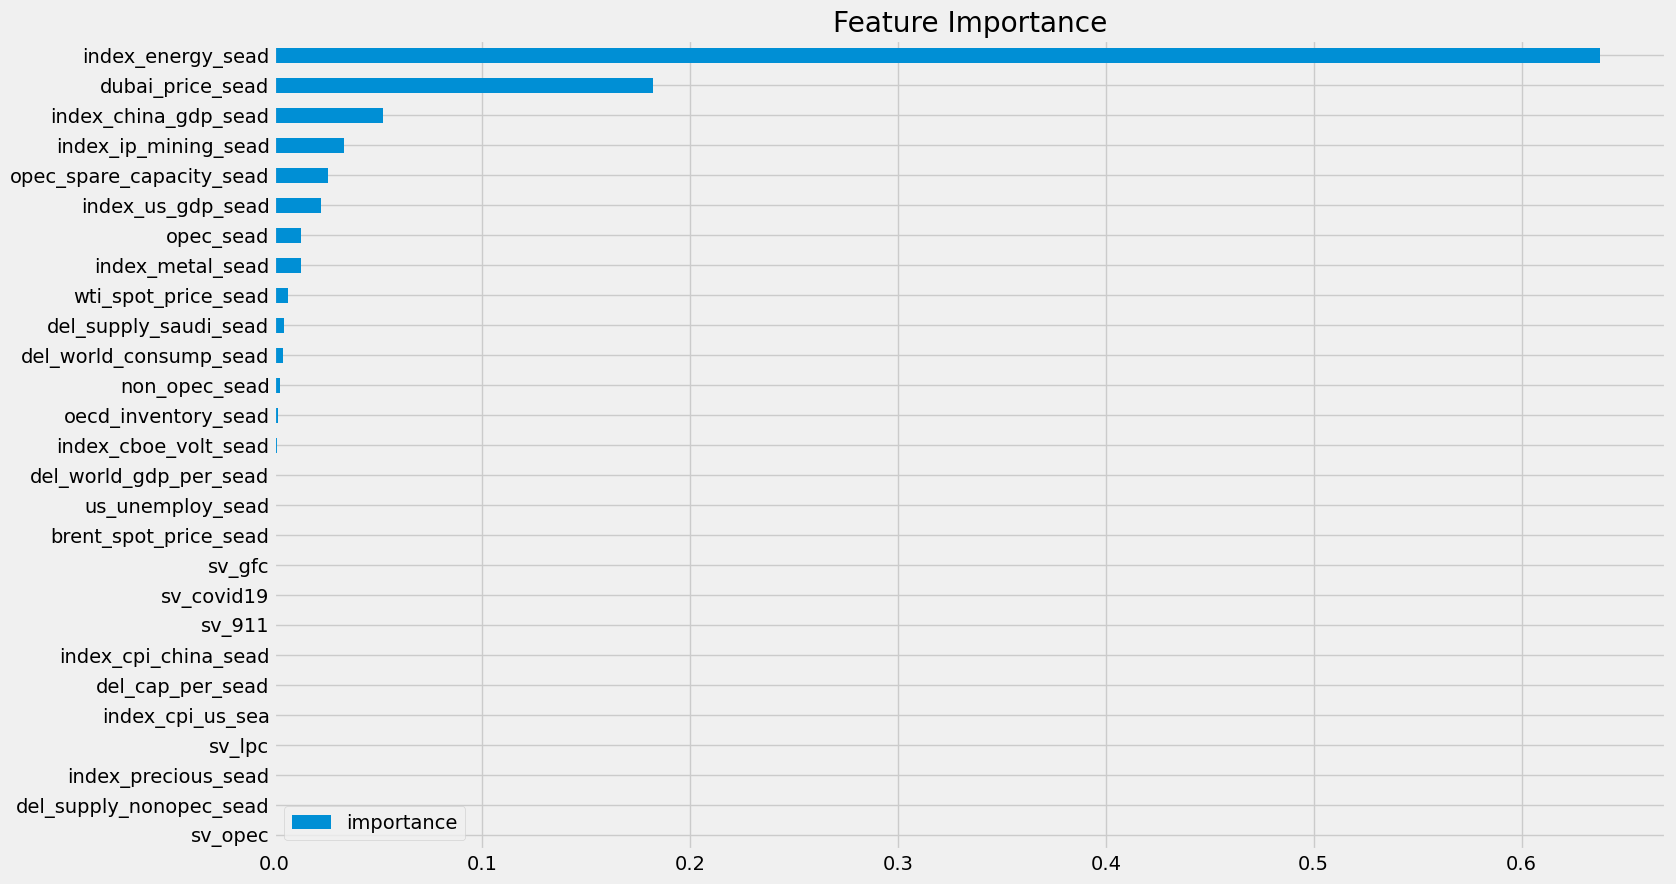

In [16]:
fi = pd.DataFrame(data=reg.feature_importances_, 
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', figsize=(16, 10), title='Feature Importance')
plt.show()

## Fitting the model with test data

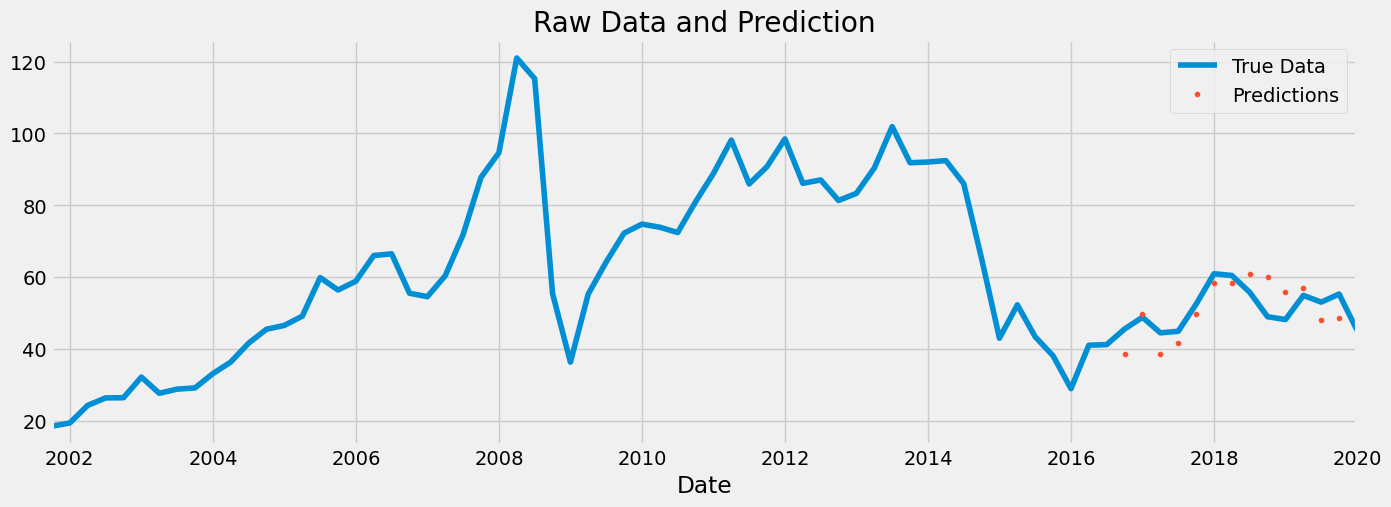

In [20]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['nm_oil_price']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['True Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()
df.to_csv('file_name_1.csv')

## Calculating mean squared error (MSE)

In [21]:
score = np.sqrt(mean_squared_error(test['nm_oil_price'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 5.39


## Calcultating absolute sum of error (ASE)

In [22]:
ase = test['error'] = sum(np.abs(test[TARGET] - test['prediction']))
print(ase)

65.04906875610352


In [23]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits=5, test_size=4*1, gap=0)
df = df.sort_index()

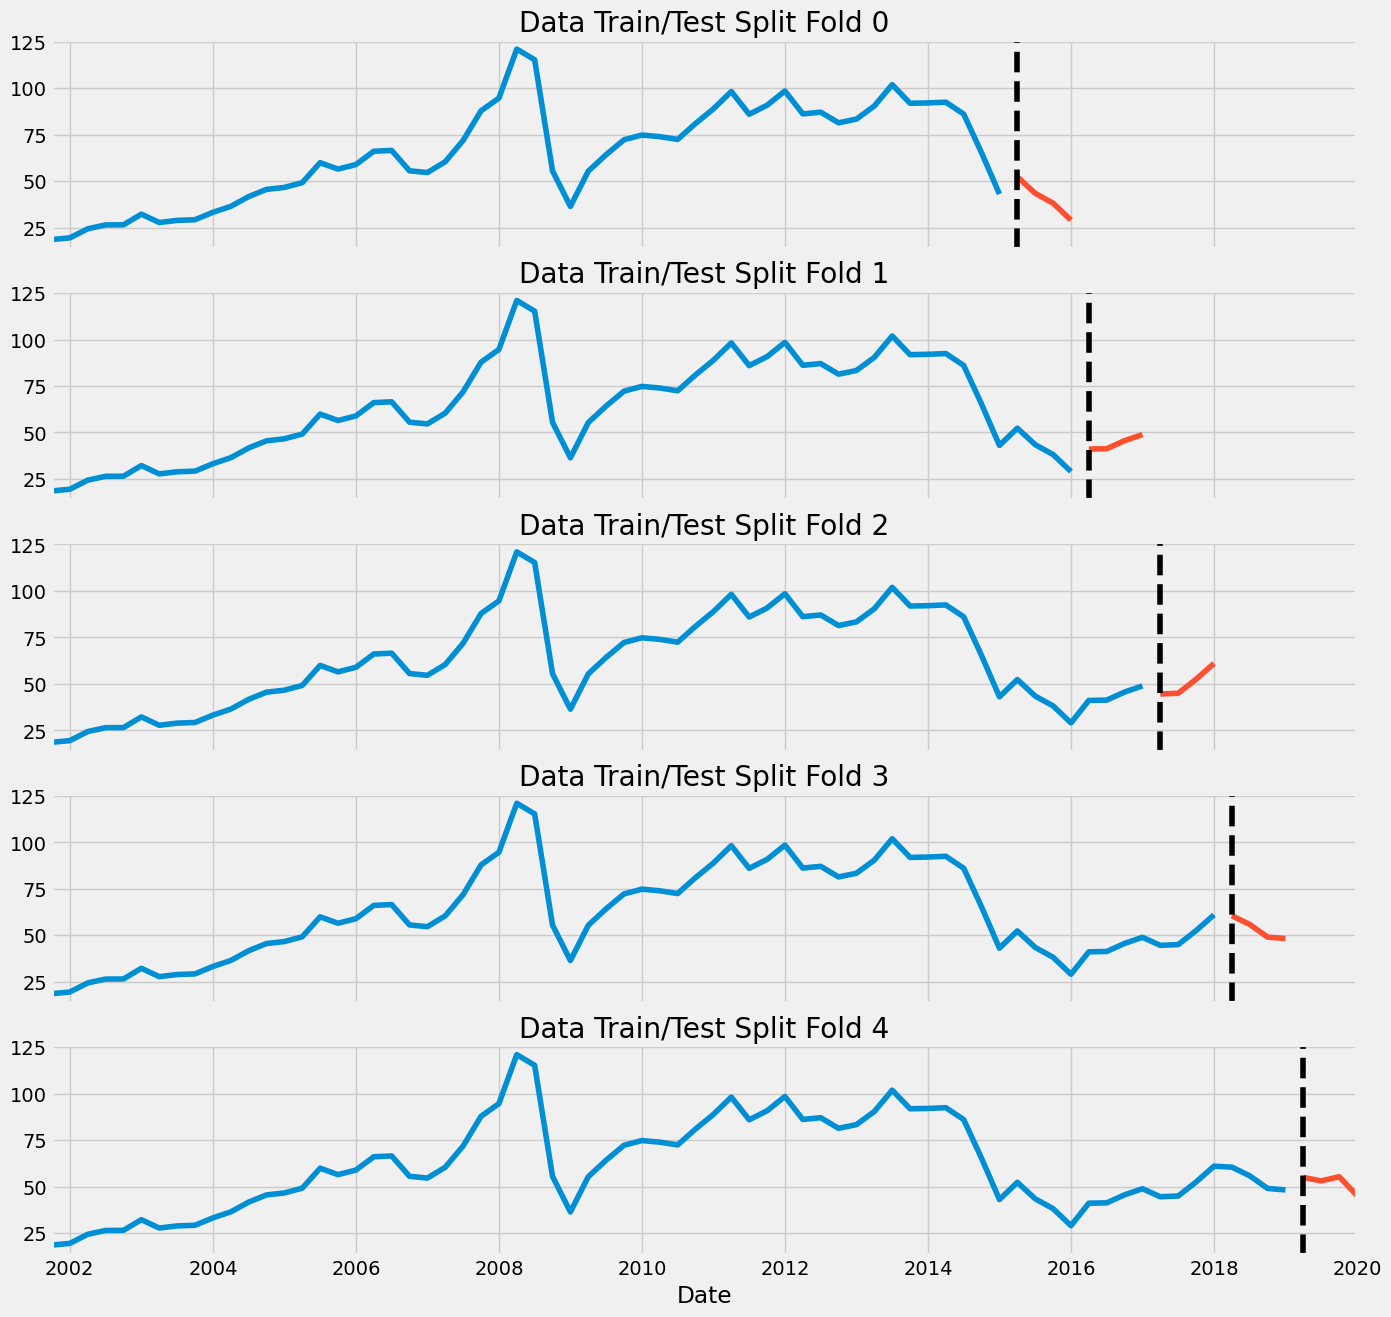

In [24]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    train['nm_oil_price'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['nm_oil_price'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

# Model tuning

## K-fold cross-validation

### Creating folds, model features and running XGBoost regression

In [25]:
tss = TimeSeriesSplit(n_splits=5, test_size=4*1, gap=0)
df = df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)

    FEATURES = ['wti_spot_price_sead', 'brent_spot_price_sead', 'dubai_price_sead',\
       'index_china_gdp_sead', 'index_us_gdp_sead', 'index_cboe_volt_sead',\
       'us_unemploy_sead', 'index_ip_mining_sead', 'index_cpi_china_sead',\
       'opec_sead', 'non_opec_sead', 'index_cpi_us_sea', 'index_energy_sead',\
       'index_metal_sead', 'index_precious_sead', 'del_supply_nonopec_sead',\
       'del_cap_per_sead', 'del_world_gdp_per_sead', 'del_supply_saudi_sead',\
       'opec_spare_capacity_sead', 'oecd_inventory_sead',\
       'del_world_consump_sead', 'sv_911', 'sv_covid19', 'sv_gfc', 'sv_lpc',\
       'sv_opec']
    
    TARGET = 'nm_oil_price'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=800,
                           early_stopping_rounds=50,
                           objective='reg:squarederror',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[0]	validation_0-rmse:68.83203	validation_1-rmse:40.73278
[100]	validation_0-rmse:27.45820	validation_1-rmse:14.16725
[200]	validation_0-rmse:11.89538	validation_1-rmse:5.08708
[300]	validation_0-rmse:5.65334	validation_1-rmse:3.60860
[344]	validation_0-rmse:4.20289	validation_1-rmse:3.74525
[0]	validation_0-rmse:67.27091	validation_1-rmse:43.44278
[100]	validation_0-rmse:26.80936	validation_1-rmse:16.31359
[200]	validation_0-rmse:11.58014	validation_1-rmse:6.38134
[300]	validation_0-rmse:5.48660	validation_1-rmse:3.16668
[360]	validation_0-rmse:3.69929	validation_1-rmse:3.29519
[0]	validation_0-rmse:65.99231	validation_1-rmse:50.17294
[100]	validation_0-rmse:26.26254	validation_1-rmse:18.17413
[200]	validation_0-rmse:11.31340	validation_1-rmse:6.41418
[300]	validation_0-rmse:5.37346	validation_1-rmse:1.65475
[360]	validation_0-rmse:3.63830	validation_1-rmse:2.25071
[0]	validation_0-rmse:65.14400	validation_1-rmse:52.55985
[100]	validation_0-rmse:25.87161	validation_1-rmse:14.92703
[20

### Calculating the fold scores

In [26]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 3.6044
Fold scores:[3.6070443766642146, 3.1138145048350507, 1.603863503846607, 4.77052410703903, 4.92682569360626]


### Plotting variable importance factors

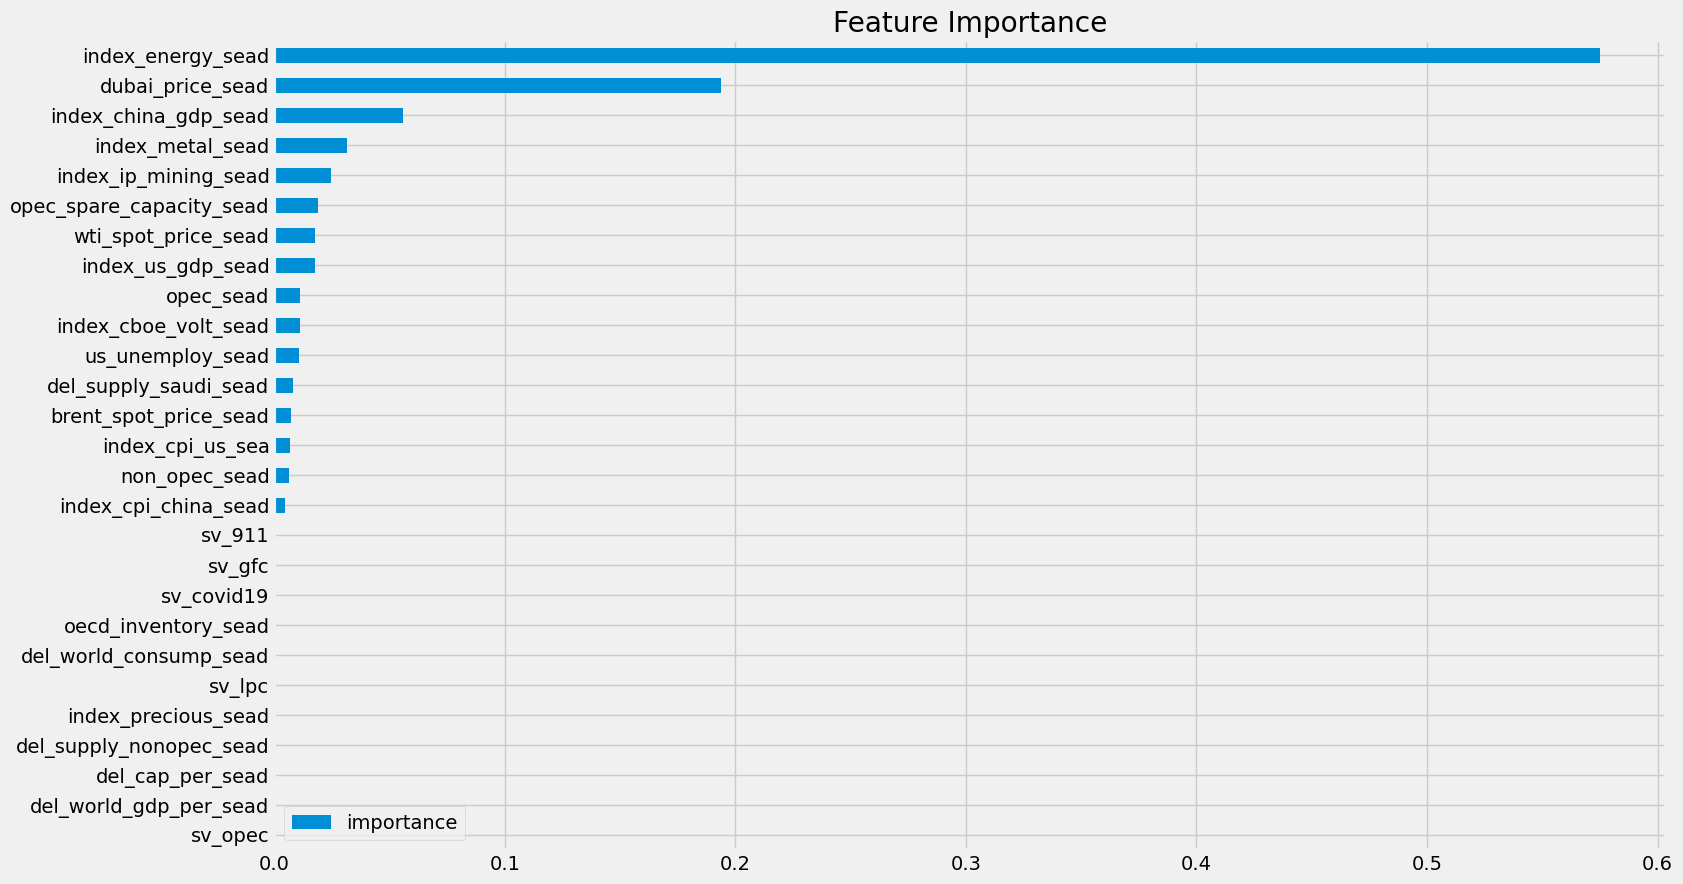

In [27]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', figsize=(16, 10), title='Feature Importance')
plt.show()

### Fitting the model with test data

In [29]:
test['prediction'] = reg.predict(X_test)
test

,wti_spot_price_sead,brent_spot_price_sead,dubai_price_sead,index_china_gdp_sead,index_us_gdp_sead,index_cboe_volt_sead,us_unemploy_sead,index_ip_mining_sead,index_cpi_china_sead,opec_sead,non_opec_sead,index_cpi_us_sea,index_energy_sead,index_metal_sead,index_precious_sead,del_supply_nonopec_sead,del_cap_per_sead,del_world_gdp_per_sead,del_supply_saudi_sead,opec_spare_capacity_sead,oecd_inventory_sead,del_world_consump_sead,sv_911,sv_covid19,sv_gfc,sv_lpc,sv_opec,nm_oil_price,wti_spot_price,brent_spot_price,dubai_price,index_china_gdp,index_us_gdp,index_cboe_volt,us_unemploy,index_ip_mining,index_cpi_china,opec,non_opec,index_cpi_us,index_energy,index_metal,index_precious,del_supply_nonopec,del_cap_per,del_world_gdp_per,del_supply_saudi,opec_spare_capacity,oecd_inventory,del_world_consump,prediction_x,prediction_y,prediction,quarter,year
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-01,1.586849,1.600618,66.351174,0.034717,0.500572,15.607082,-0.231803,2.310075,0.847382,-582.377567,502.860794,0.137087,64.345841,54.681416,54.681416,-0.162970,1.055850,1.055850,-0.249013,2.239887,11.392439,-7.273676,0,0,0,0,0,54.936667,59.783333,68.923333,67.030000,98.631879,112.184,15.183016,3.633333,121.3613,2.633333,29974.0,57429.0,0.254097,82.647259,79.591555,98.911806,2.10,1.01,3.07,-0.28,2.46,4448.003591,-6.15,56.950169,56.950169,51.269615,2,2019
2019-07-01,-3.068620,-5.437353,59.140612,0.189858,0.453394,16.176525,0.007713,-0.247011,0.166416,-1070.462809,344.501112,0.148865,53.420628,53.798224,53.798224,-0.584563,-0.704988,-0.704988,-1.057836,2.326970,18.190848,-7.449319,0,1,0,0,0,53.070000,56.370000,61.930000,60.890000,98.622713,112.550,15.960156,3.633333,121.8544,2.866667,29392.0,57825.0,0.080124,74.731599,78.134165,111.488820,1.53,-0.36,2.93,-1.10,2.28,4486.731336,-13.69,48.113838,48.113838,46.894878,3,2019
2019-10-01,1.193829,0.408424,59.909917,0.302619,0.416982,14.255998,-0.040490,-0.698809,1.392454,247.564241,542.789804,0.265119,54.882396,51.978411,51.978411,0.310226,0.634782,0.634782,-0.925075,2.226512,-25.148422,4.621965,0,1,0,0,0,55.326667,56.956667,63.410000,61.430000,98.922686,112.963,13.985781,3.600000,121.0686,4.266667,29601.0,58779.0,0.028006,76.123328,76.714211,112.223609,1.84,0.58,2.42,-0.90,2.07,4413.825366,-9.22,48.563908,48.563908,49.245811,4,2019
2020-01-01,-9.117127,-9.564788,50.736908,-4.302518,0.479495,29.614833,0.196531,-0.662614,0.722923,-827.418054,1117.788215,-0.044480,46.649753,46.466794,46.466794,0.536314,1.235642,1.235642,-0.250451,2.825895,35.768689,1.262388,0,1,0,0,0,45.273333,45.756667,50.440000,50.673333,94.949739,113.418,31.224516,3.800000,119.5387,4.966667,28246.0,59931.0,0.148131,61.671272,73.141657,118.290424,2.45,1.45,-1.42,-0.20,2.78,4456.016624,-7.87,47.926842,47.926842,48.195362,1,2020


In [30]:
# df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
df

,wti_spot_price_sead,brent_spot_price_sead,dubai_price_sead,index_china_gdp_sead,index_us_gdp_sead,index_cboe_volt_sead,us_unemploy_sead,index_ip_mining_sead,index_cpi_china_sead,opec_sead,non_opec_sead,index_cpi_us_sea,index_energy_sead,index_metal_sead,index_precious_sead,del_supply_nonopec_sead,del_cap_per_sead,del_world_gdp_per_sead,del_supply_saudi_sead,opec_spare_capacity_sead,oecd_inventory_sead,del_world_consump_sead,sv_911,sv_covid19,sv_gfc,sv_lpc,sv_opec,nm_oil_price,wti_spot_price,brent_spot_price,dubai_price,index_china_gdp,index_us_gdp,index_cboe_volt,us_unemploy,index_ip_mining,index_cpi_china,opec,non_opec,index_cpi_us,index_energy,index_metal,index_precious,del_supply_nonopec,del_cap_per,del_world_gdp_per,del_supply_saudi,opec_spare_capacity,oecd_inventory,del_world_consump,prediction_x,prediction_y,prediction
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-10-01,-4.490646,-4.226309,18.856513,0.000937,0.227692,27.673258,0.598185,-1.049224,-0.769879,-860.534407,209.852667,0.015057,21.642637,14.523215,14.523215,0.082598,0.959399,0.959399,-1.118946,5.075130,56.310536,0.831312,1,0,0,0,0,18.556667,20.400000,19.350000,18.238671,98.223037,80.245,27.910000,5.500000,82.9672,-0.133333,27307.658667,40521.307667,-0.299975,27.180842,31.450600,22.616555,0.64,1.04,1.80,-1.19,5.21,3963.919000,1.48,NaN,NaN,NaN
2002-01-01,0.549873,1.298047,20.049251,0.289063,0.267035,21.835409,0.248901,-2.372902,-0.792123,-886.490642,165.250462,0.072270,21.382668,16.255997,16.255997,0.272427,1.188425,1.188425,-1.218224,6.418502,50.330375,0.935855,1,0,0,0,0,19.463333,21.656667,21.133333,20.019124,98.160446,80.504,21.360833,5.700000,80.8947,-0.600000,26221.237000,40685.595667,0.394686,28.928240,33.278799,23.651520,0.80,0.84,2.19,-1.17,6.10,3962.906333,2.52,NaN,NaN,NaN
2002-04-01,3.984386,2.823201,21.356935,0.271872,0.281793,22.399876,0.117971,-0.235625,-0.524632,-136.395835,514.960462,0.099996,23.155462,19.310258,19.310258,0.299186,1.487938,1.487938,-0.638675,6.401345,-14.841305,0.435733,1,0,0,0,0,24.353333,26.246667,25.053333,24.272817,98.393999,80.783,21.643125,5.833333,80.7034,-1.066667,25681.775000,40906.192000,0.204967,34.013575,33.500873,25.412918,1.56,1.81,2.71,-0.53,6.69,3977.571667,2.71,NaN,NaN,NaN
2002-07-01,1.523430,1.585978,24.596098,0.064648,0.398350,33.437746,-0.066227,-0.265306,0.516133,278.343329,-212.359239,0.315314,24.727300,15.919829,15.919829,-0.495299,0.592642,0.592642,-0.180427,6.009848,-50.213447,-1.322607,1,0,0,0,0,26.420000,28.340000,26.930000,25.575567,98.697058,81.172,35.068438,5.733333,80.1187,-0.766667,26543.531000,40615.380000,0.203447,35.722116,32.354218,25.452320,0.74,0.76,3.26,-0.27,5.86,3971.300667,1.54,NaN,NaN,NaN
2002-10-01,2.002322,2.000562,25.017763,-0.036708,0.446995,30.604044,0.067198,-0.856318,0.293766,743.941067,104.733869,0.301491,26.607639,17.440095,17.440095,0.015500,0.079919,0.079919,0.427349,4.452035,-47.202333,0.426174,1,0,0,0,0,26.473333,28.216667,26.736667,25.014893,98.996896,81.638,30.726719,5.866667,79.2454,-0.633333,27287.422333,41094.401667,-0.018294,37.222773,33.203148,25.924394,0.74,-0.07,3.33,0.37,4.50,3901.982000,1.96,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,-1.850041,-1.121303,64.433985,-0.026061,0.462764,15.551509,0.030173,0.749180,-0.328517,-1099.420444,2453.239283,0.204249,62.980573,54.666311,54.666311,-1.246996,1.363382,1.363382,-0.157307,2.207457,5.221518,-0.031430,0,0,0,0,0,48.226667,54.826667,63.170000,63.360000,98.784252,111.562,16.468689,3.866667,118.8664,1.833333,30484.000000,57420.000000,0.392500,79.504670,78.996017,99.153513,2.35,1.10,2.88,-0.11,2.19,4417.014951,0.95,55.999157,55.999157,55.999157
2019-04-01,1.586849,1.600618,66.351174,0.034717,0.500572,15.607082,-0.231803,2.310075,0.847382,-582.377567,502.860794,0.137087,64.345841,54.681416,54.681416,-0.162970,1.055850

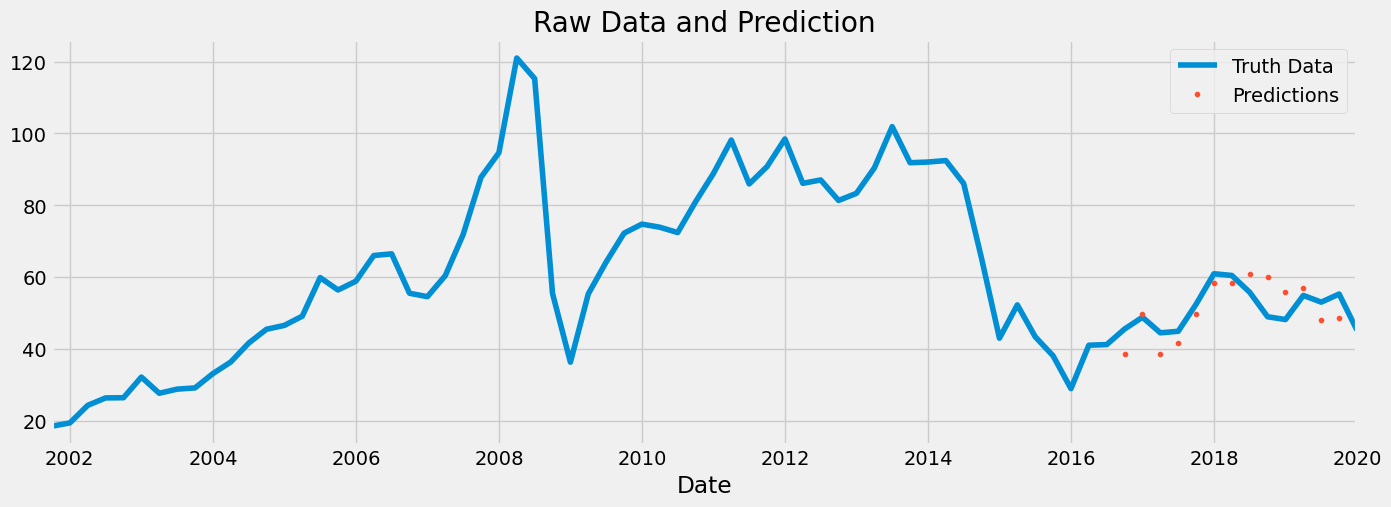

In [31]:
ax = df[['nm_oil_price']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()
df.to_csv('file_name.csv')

### Calculating mean squared error (MSE)

In [32]:
score = np.sqrt(mean_squared_error(test['nm_oil_price'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 4.93


### Calcultating absolute sum of error (ASE)

In [33]:
ase = test['error'] = sum(np.abs(test[TARGET] - test['prediction']))
print(ase)

18.845057067871203


In [34]:
df

,wti_spot_price_sead,brent_spot_price_sead,dubai_price_sead,index_china_gdp_sead,index_us_gdp_sead,index_cboe_volt_sead,us_unemploy_sead,index_ip_mining_sead,index_cpi_china_sead,opec_sead,non_opec_sead,index_cpi_us_sea,index_energy_sead,index_metal_sead,index_precious_sead,del_supply_nonopec_sead,del_cap_per_sead,del_world_gdp_per_sead,del_supply_saudi_sead,opec_spare_capacity_sead,oecd_inventory_sead,del_world_consump_sead,sv_911,sv_covid19,sv_gfc,sv_lpc,sv_opec,nm_oil_price,wti_spot_price,brent_spot_price,dubai_price,index_china_gdp,index_us_gdp,index_cboe_volt,us_unemploy,index_ip_mining,index_cpi_china,opec,non_opec,index_cpi_us,index_energy,index_metal,index_precious,del_supply_nonopec,del_cap_per,del_world_gdp_per,del_supply_saudi,opec_spare_capacity,oecd_inventory,del_world_consump,prediction_x,prediction_y,prediction
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-10-01,-4.490646,-4.226309,18.856513,0.000937,0.227692,27.673258,0.598185,-1.049224,-0.769879,-860.534407,209.852667,0.015057,21.642637,14.523215,14.523215,0.082598,0.959399,0.959399,-1.118946,5.075130,56.310536,0.831312,1,0,0,0,0,18.556667,20.400000,19.350000,18.238671,98.223037,80.245,27.910000,5.500000,82.9672,-0.133333,27307.658667,40521.307667,-0.299975,27.180842,31.450600,22.616555,0.64,1.04,1.80,-1.19,5.21,3963.919000,1.48,NaN,NaN,NaN
2002-01-01,0.549873,1.298047,20.049251,0.289063,0.267035,21.835409,0.248901,-2.372902,-0.792123,-886.490642,165.250462,0.072270,21.382668,16.255997,16.255997,0.272427,1.188425,1.188425,-1.218224,6.418502,50.330375,0.935855,1,0,0,0,0,19.463333,21.656667,21.133333,20.019124,98.160446,80.504,21.360833,5.700000,80.8947,-0.600000,26221.237000,40685.595667,0.394686,28.928240,33.278799,23.651520,0.80,0.84,2.19,-1.17,6.10,3962.906333,2.52,NaN,NaN,NaN
2002-04-01,3.984386,2.823201,21.356935,0.271872,0.281793,22.399876,0.117971,-0.235625,-0.524632,-136.395835,514.960462,0.099996,23.155462,19.310258,19.310258,0.299186,1.487938,1.487938,-0.638675,6.401345,-14.841305,0.435733,1,0,0,0,0,24.353333,26.246667,25.053333,24.272817,98.393999,80.783,21.643125,5.833333,80.7034,-1.066667,25681.775000,40906.192000,0.204967,34.013575,33.500873,25.412918,1.56,1.81,2.71,-0.53,6.69,3977.571667,2.71,NaN,NaN,NaN
2002-07-01,1.523430,1.585978,24.596098,0.064648,0.398350,33.437746,-0.066227,-0.265306,0.516133,278.343329,-212.359239,0.315314,24.727300,15.919829,15.919829,-0.495299,0.592642,0.592642,-0.180427,6.009848,-50.213447,-1.322607,1,0,0,0,0,26.420000,28.340000,26.930000,25.575567,98.697058,81.172,35.068438,5.733333,80.1187,-0.766667,26543.531000,40615.380000,0.203447,35.722116,32.354218,25.452320,0.74,0.76,3.26,-0.27,5.86,3971.300667,1.54,NaN,NaN,NaN
2002-10-01,2.002322,2.000562,25.017763,-0.036708,0.446995,30.604044,0.067198,-0.856318,0.293766,743.941067,104.733869,0.301491,26.607639,17.440095,17.440095,0.015500,0.079919,0.079919,0.427349,4.452035,-47.202333,0.426174,1,0,0,0,0,26.473333,28.216667,26.736667,25.014893,98.996896,81.638,30.726719,5.866667,79.2454,-0.633333,27287.422333,41094.401667,-0.018294,37.222773,33.203148,25.924394,0.74,-0.07,3.33,0.37,4.50,3901.982000,1.96,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,-1.850041,-1.121303,64.433985,-0.026061,0.462764,15.551509,0.030173,0.749180,-0.328517,-1099.420444,2453.239283,0.204249,62.980573,54.666311,54.666311,-1.246996,1.363382,1.363382,-0.157307,2.207457,5.221518,-0.031430,0,0,0,0,0,48.226667,54.826667,63.170000,63.360000,98.784252,111.562,16.468689,3.866667,118.8664,1.833333,30484.000000,57420.000000,0.392500,79.504670,78.996017,99.153513,2.35,1.10,2.88,-0.11,2.19,4417.014951,0.95,55.999157,55.999157,55.999157
2019-04-01,1.586849,1.600618,66.351174,0.034717,0.500572,15.607082,-0.231803,2.310075,0.847382,-582.377567,502.860794,0.137087,64.345841,54.681416,54.681416,-0.162970,1.055850

In [36]:
test

,wti_spot_price_sead,brent_spot_price_sead,dubai_price_sead,index_china_gdp_sead,index_us_gdp_sead,index_cboe_volt_sead,us_unemploy_sead,index_ip_mining_sead,index_cpi_china_sead,opec_sead,non_opec_sead,index_cpi_us_sea,index_energy_sead,index_metal_sead,index_precious_sead,del_supply_nonopec_sead,del_cap_per_sead,del_world_gdp_per_sead,del_supply_saudi_sead,opec_spare_capacity_sead,oecd_inventory_sead,del_world_consump_sead,sv_911,sv_covid19,sv_gfc,sv_lpc,sv_opec,nm_oil_price,wti_spot_price,brent_spot_price,dubai_price,index_china_gdp,index_us_gdp,index_cboe_volt,us_unemploy,index_ip_mining,index_cpi_china,opec,non_opec,index_cpi_us,index_energy,index_metal,index_precious,del_supply_nonopec,del_cap_per,del_world_gdp_per,del_supply_saudi,opec_spare_capacity,oecd_inventory,del_world_consump,prediction_x,prediction_y,prediction,quarter,year,error
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-01,1.586849,1.600618,66.351174,0.034717,0.500572,15.607082,-0.231803,2.310075,0.847382,-582.377567,502.860794,0.137087,64.345841,54.681416,54.681416,-0.162970,1.055850,1.055850,-0.249013,2.239887,11.392439,-7.273676,0,0,0,0,0,54.936667,59.783333,68.923333,67.030000,98.631879,112.184,15.183016,3.633333,121.3613,2.633333,29974.0,57429.0,0.254097,82.647259,79.591555,98.911806,2.10,1.01,3.07,-0.28,2.46,4448.003591,-6.15,56.950169,56.950169,51.269615,2,2019,18.845057
2019-07-01,-3.068620,-5.437353,59.140612,0.189858,0.453394,16.176525,0.007713,-0.247011,0.166416,-1070.462809,344.501112,0.148865,53.420628,53.798224,53.798224,-0.584563,-0.704988,-0.704988,-1.057836,2.326970,18.190848,-7.449319,0,1,0,0,0,53.070000,56.370000,61.930000,60.890000,98.622713,112.550,15.960156,3.633333,121.8544,2.866667,29392.0,57825.0,0.080124,74.731599,78.134165,111.488820,1.53,-0.36,2.93,-1.10,2.28,4486.731336,-13.69,48.113838,48.113838,46.894878,3,2019,18.845057
2019-10-01,1.193829,0.408424,59.909917,0.302619,0.416982,14.255998,-0.040490,-0.698809,1.392454,247.564241,542.789804,0.265119,54.882396,51.978411,51.978411,0.310226,0.634782,0.634782,-0.925075,2.226512,-25.148422,4.621965,0,1,0,0,0,55.326667,56.956667,63.410000,61.430000,98.922686,112.963,13.985781,3.600000,121.0686,4.266667,29601.0,58779.0,0.028006,76.123328,76.714211,112.223609,1.84,0.58,2.42,-0.90,2.07,4413.825366,-9.22,48.563908,48.563908,49.245811,4,2019,18.845057
2020-01-01,-9.117127,-9.564788,50.736908,-4.302518,0.479495,29.614833,0.196531,-0.662614,0.722923,-827.418054,1117.788215,-0.044480,46.649753,46.466794,46.466794,0.536314,1.235642,1.235642,-0.250451,2.825895,35.768689,1.262388,0,1,0,0,0,45.273333,45.756667,50.440000,50.673333,94.949739,113.418,31.224516,3.800000,119.5387,4.966667,28246.0,59931.0,0.148131,61.671272,73.141657,118.290424,2.45,1.45,-1.42,-0.20,2.78,4456.016624,-7.87,47.926842,47.926842,48.195362,1,2020,18.845057
